In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import numpy as np

In [60]:
df = pd.read_csv('../data/Global Economy Indicators.csv')

# select country
df = df[df['Country'].isin([' United Kingdom ', ' China ', ' France ', ' United States ', ' Russian Federation '])]

# select year
df = df[df['Year'].isin(range(2004, 2022))]

# select columns to show
df = df[['Country', 'Year', 'Gross Domestic Product (GDP)']]

df = df.reset_index(drop=True)

countries = [' United States ', ' China ', ' United Kingdom ', ' France ', ' Russian Federation ']

print(df)

            Country  Year  Gross Domestic Product (GDP)
0            China   2004                  1.960000e+12
1            China   2005                  2.290000e+12
2            China   2006                  2.750000e+12
3            China   2007                  3.550000e+12
4            China   2008                  4.590000e+12
..              ...   ...                           ...
85   United States   2017                  1.950000e+13
86   United States   2018                  2.050000e+13
87   United States   2019                  2.140000e+13
88   United States   2020                  2.110000e+13
89   United States   2021                  2.330000e+13

[90 rows x 3 columns]


In [61]:
data = {}
colors = ['purple', 'steelblue', 'red', 'orange', 'green']
markers = ['h', 'h', 'h', 'h', 'h']

plt.figure(figsize=(10, 4))

for index, row in df.iterrows():
    if row['Country'] not in data:
        data[row['Country']] = {row['Year']: row['Gross Domestic Product (GDP)']}
    else:
        data[row['Country']][row['Year']] = row['Gross Domestic Product (GDP)']

for index, country in enumerate(countries):
    data[country]['color'] = colors[index]
    data[country]['marker'] = markers[index]
data

{' China ': {2004: 1960000000000.0,
  2005: 2290000000000.0,
  2006: 2750000000000.0,
  2007: 3550000000000.0,
  2008: 4590000000000.0,
  2009: 5100000000000.0,
  2010: 6090000000000.0,
  2011: 7550000000000.0,
  2012: 8530000000000.0,
  2013: 9570000000000.0,
  2014: 10500000000000.0,
  2015: 11100000000000.0,
  2016: 11200000000000.0,
  2017: 12300000000000.0,
  2018: 13900000000000.0,
  2019: 14300000000000.0,
  2020: 14700000000000.0,
  2021: 17700000000000.0,
  'color': 'steelblue',
  'marker': 'h'},
 ' France ': {2004: 2120000000000.0,
  2005: 2200000000000.0,
  2006: 2320000000000.0,
  2007: 2660000000000.0,
  2008: 2920000000000.0,
  2009: 2690000000000.0,
  2010: 2640000000000.0,
  2011: 2860000000000.0,
  2012: 2680000000000.0,
  2013: 2810000000000.0,
  2014: 2850000000000.0,
  2015: 2440000000000.0,
  2016: 2470000000000.0,
  2017: 2600000000000.0,
  2018: 2790000000000.0,
  2019: 2730000000000.0,
  2020: 2640000000000.0,
  2021: 2960000000000.0,
  'color': 'orange',
  'mar

<Figure size 720x288 with 0 Axes>

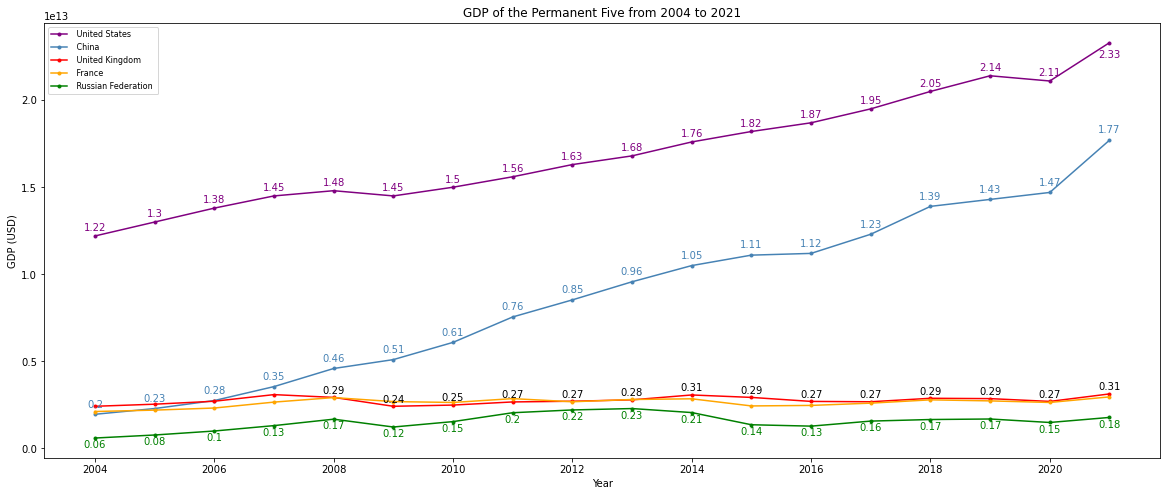

In [62]:
plt.figure(figsize=(20, 8))

for country in countries:
    x = [i for i in range(2004, 2022)]
    y = [data[country][i] for i in x]
    color = data[country]['color']
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(x, y, label=country, marker='.', color=color)

for country in [' United States ']:
    x = [i for i in range(2004, 2021)]
    y = [data[country][i] for i in x]
    for i, data_point in enumerate(y):
        plt.annotate(str(round(data_point / 1e13, 2)), (x[i], data_point), textcoords="offset points", xytext=(0, 5), ha='center', color='purple')

for country in [' United States ']:
    x = [2021]
    y = [data[country][i] for i in x]
    for i, data_point in enumerate(y):
        plt.annotate(str(round(data_point / 1e13, 2)), (x[i], data_point), textcoords="offset points", xytext=(0, -15), ha='center', color='purple')

for country in [' China ']:
    x = [i for i in range(2004, 2022)]
    y = [data[country][i] for i in x]
    for i, data_point in enumerate(y):
        plt.annotate(str(round(data_point / 1e13, 2)), (x[i], data_point), textcoords="offset points", xytext=(0, 7), ha='center', color=(70/255, 130/255, 180/255))

for country in [' United Kingdom ']:
    x = [i for i in range(2008, 2022)]
    y = [data[country][i] for i in x]
    for i, data_point in enumerate(y):
        plt.annotate(str(round(data_point / 1e13, 2)), (x[i], data_point), textcoords="offset points", xytext=(0, 4), ha='center')

for country in [' Russian Federation ']:
    x = [i for i in range(2004, 2022)]
    y = [data[country][i] for i in x]
    for i, data_point in enumerate(y):
        plt.annotate(str(round(data_point / 1e13, 2)), (x[i], data_point), textcoords="offset points", xytext=(0, -10), ha='center', color='green')
plt.title('GDP of the Permanent Five from 2004 to 2021')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

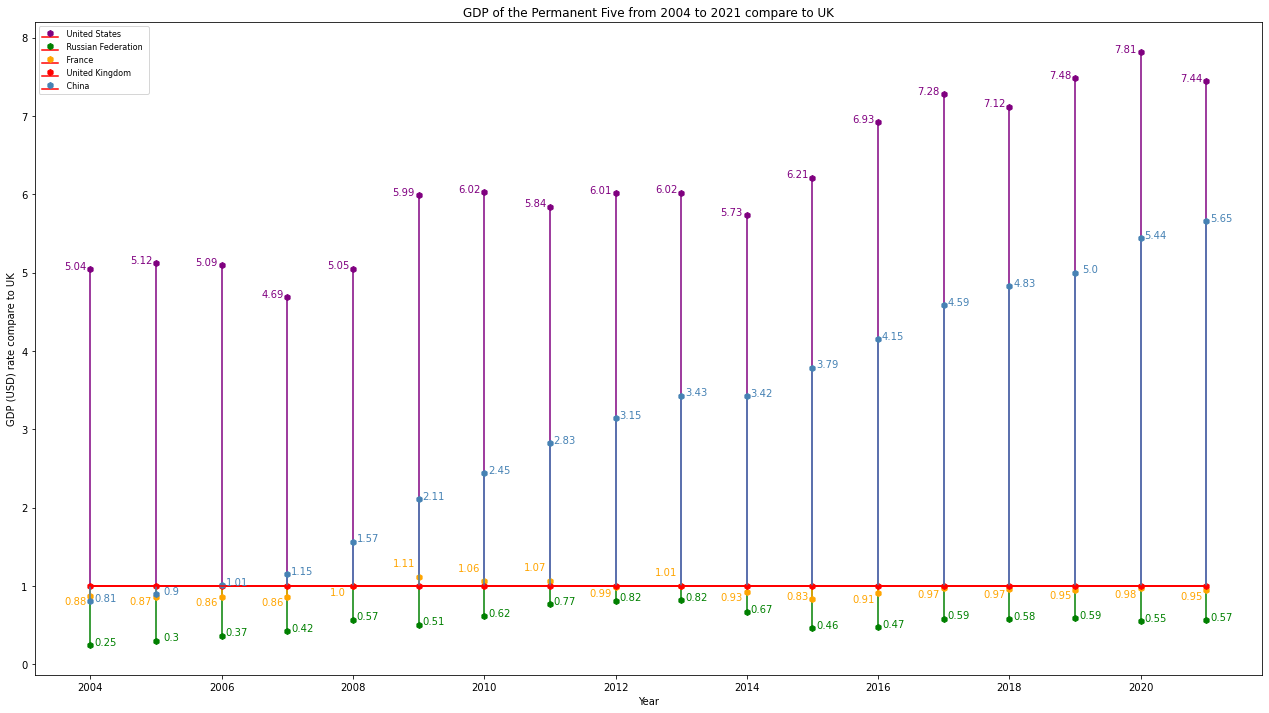

In [98]:
plt.figure(figsize=(22, 12))
base = ' United Kingdom '
for country in [' United States ', ' Russian Federation ', ' France ', ' United Kingdom ', ' China ']:
    x = [i for i in range(2004, 2022)]
    y = [data[country][i] / data[base][i] for i in x]
    marker = data[country]['marker']
    color = data[country]['color']
    markerline, stemlines, baseline = plt.stem(x, y, linefmt=color, markerfmt=marker, bottom=1, label=country, use_line_collection=True, basefmt='red')
    plt.setp(markerline, 'color', color, 'markerfacecolor', color)

# for i in range(2004, 2022):
#     y = []
#     for country in [' United States ', ' Russian Federation ', ' France ', ' United Kingdom ', ' China ']:
#         y.append([abs(data[country][i] / data[base][i]), data[country][i] / data[base][i],  country])
#     y = sorted(y, key=lambda x:x[0], reverse=True)
#     for point in y:
#         marker = data[point[2]]['marker']
#         color = data[point[2]]['color']
#         markerline, stemlines, baseline = plt.stem([i], [point[1]], linefmt=color, markerfmt=marker, bottom=0, use_line_collection=True, basefmt='black')
#         plt.setp(markerline, 'color', color, 'markerfacecolor', color)

for country in [' United States ']:
    x = [i for i in range(2004, 2022)]
    y = [data[country][i] / data[base][i] for i in x]
    for i, data_point in enumerate(y):
        plt.annotate(str(round(data_point, 2)), (x[i], data_point), textcoords="offset points", xytext=(-15, 0), ha='center', color='purple')

for country in [' China ']:
    x = [i for i in range(2004, 2022)]
    y = [data[country][i] / data[base][i] for i in x]
    for i, data_point in enumerate(y):
        plt.annotate(str(round(data_point, 2)), (x[i], data_point), textcoords="offset points", xytext=(15, 0), ha='center', color=(70/255, 130/255, 180/255))

# for country in [' United Kingdom ']:
#     x = [i for i in range(2004, 2022)]
#     y = [data[country][i] / data[base][i] for i in x]
#     for i, data_point in enumerate(y):
#         plt.annotate(str(round(data_point, 2)), (x[i], data_point), textcoords="offset points", xytext=(15, 0), ha='center', color='red')

for country in [' France ']:
    x = [i for i in range(2004, 2022)]
    y = [data[country][i] / data[base][i] for i in x]
    for i, data_point in enumerate(y):
        if 0 < 1 - data_point < 0.15:
            plt.annotate(str(round(data_point, 2)), (x[i], data_point), textcoords="offset points", xytext=(-15, int((-data_point) * 10)), ha='center', color='orange')
        elif 0 < data_point - 1 < 0.15:
            plt.annotate(str(round(data_point, 2)), (x[i], data_point), textcoords="offset points", xytext=(-15, int((data_point) * 10)), ha='center', color='orange')
        else:
            plt.annotate(str(round(data_point, 2)), (x[i], data_point), textcoords="offset points", xytext=(-15, 0), ha='center', color='orange')

for country in [' Russian Federation ']:
    x = [i for i in range(2004, 2022)]
    y = [data[country][i] / data[base][i] for i in x]
    for i, data_point in enumerate(y):
        plt.annotate(str(round(data_point, 2)), (x[i], data_point), textcoords="offset points", xytext=(15, 0), ha='center', color='green')

plt.xticks(np.arange(2004, 2022, step=2))
plt.title('GDP of the Permanent Five from 2004 to 2021 compared to UK')
plt.xlabel('Year')
plt.ylabel('GDP (USD) rate compare to UK')
plt.legend(loc='upper left', fontsize=8)
plt.show()

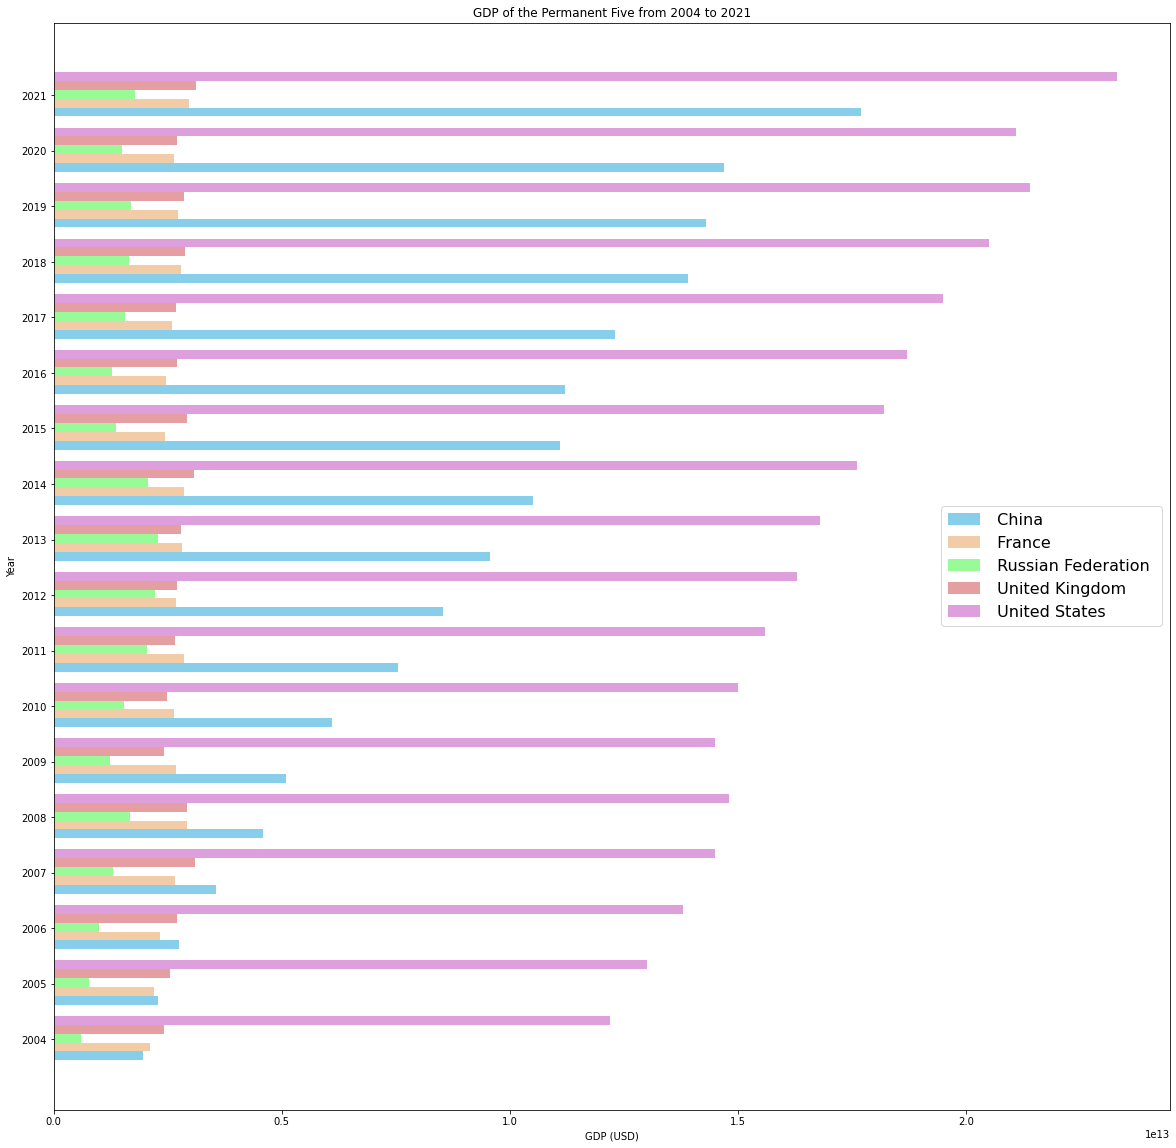

In [99]:
padding = 1
width = 0.8
bar_width = np.arange(2022 - 2004) * (5 * width + padding)

colors_change= {'steelblue': 'skyblue', 'orange': '#f1cca6', 'green': 'palegreen',  'red': '#e59ea1', 'purple': 'plum'}

fig = plt.figure(figsize=(20,20))
for index, country in enumerate(data):
    color = data[country]['color']
    color = colors_change[color]
    plt.barh(bar_width + width * index, [data[country][i] for i in range(2004, 2022)],  color=color, label=country)
plt.legend(loc='right', fontsize=16)
plt.yticks(bar_width + 1.5, range(2004, 2022))
plt.title('GDP of the Permanent Five from 2004 to 2021')
plt.ylabel('Year')
plt.xlabel('GDP (USD)')
plt.show()
